# Using this document:

You can use this to create a Gantt chart. Simples!

You can use this notebook to generate a Gantt chart in two ways.
1. For the deadlines outlined by the University [here](https://durhamuniversity.sharepoint.com/teams/ComputerScienceUndergraduateCommunity/SitePages/Level-2-Assessment-Deadlines.aspx)
2. With custom deadlines

To choose which option you'd like to go with, consult the `CUSTOMISE` variable below.
1. To choose option 1 from above, set the value of `CUSTOMISE` to `True`
2. To choose option 2 from above, set the value of `CUSTOMISE` to `False`

You can also choose whether to be able to view chronological progress in the Gantt. If you'd like to be able to see time progress, set the value of `PROGRESS` to `TRUE`. Otherwise, set the value of `PROGRESS` to `FALSE`.

## <i>Options</i>:

In [45]:
CUSTOMISE = False
PROGRESS = True

<hr>

## <i>If you set `CUSTOM` to `True` and want to create a custom Gantt</i>:

Assigned to the `COLUMNS` variable in the cell below are names of the columns in the `DataFrame` (basically Pandas' version of a table).

To add rows <b><i>(and thus bars in the Gantt)</i></b>, add arrays into `rows` with strings as entries that correspond to the attributes in `COLUMNS`. Input the date in form `dd-mm-yyyy`.

Example:
```python
rows = [
    ["Write ReqSpec", "08-10-2021", "04-11-2021"],
    ["Finish ReqSpec", "04-11-2021", "09-11-2021"]
]
```
If you would like to have progress bars and percentages in the Gantt, set the value of the variable `PROGRESS` below to `True`. If not, leave it as `False`.

After running all the cells, providing that no exception is thrown, you will find a Gantt at the bottom of the notebook.

In [46]:
COLUMNS = ["Task Name", "Start Date", "Finish Date"]
rows = []

<hr>

## <i>Executing the code</i>:

To execute the code, use these keyboard commands:

<i>Windows/Linux</i>:

1. <kbd>Esc</kbd>                          (unselect potential cells or edit modes)
2. <kbd>Ctrl</kbd> + <kbd>A</kbd>          (select all cells)
3. <kbd>Shift</kbd> + <kbd>Enter</kbd>     (run all selected)

<i>Mac</i>:

1. <kbd>Esc</kbd>                          (unselect potential cells or edit modes)
2. <kbd>⌘ Command</kbd> + <kbd>A</kbd>     (select all cells)
3. <kbd>Shift</kbd> + <kbd>Enter</kbd>     (run all selected)

<hr>

### Imports and helper functions:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

COLOUR = "#692862" # https://lh3.googleusercontent.com/proxy/aoHHekU0Yc70d4YdPiM4MAbDQzRQuKIw-fSHUASuG7PopCyrmKlXON_ID2EeZLUKnrbw53kRGT6G5S-i63dWcfOnyqRkf8oef-3QBZgBMRSzpDMdnNlt
DATE_TODAY = datetime.date.today()

def formatDates(entry):
    if type(entry) == datetime.datetime:
        day = entry.day if entry.day >= 10 else f'0{entry.day}'
        month = entry.month if entry.month >= 10 else f'0{entry.month}'
        return f'{entry.year}-{day}-{month}'
    
    if "w/c" in entry:
        entry = entry.replace("w/c", "").strip()

    day, month, year = [num for num in entry.split("/")]
    return f'{year}-{month}-{day}'


convert_str_to_date = lambda date: datetime.date.fromisoformat(date) # turns `date` from a yyyy/mm/dd str to datetime.date

# adds days to a datetime.datetime object then returns the resulting date
add_days = lambda date, days: (date + datetime.timedelta(days=days)).isoformat() 

# reverses a date string (e.g 17/04/2021 --> 2021/04/17)
reverse_date_str = lambda date: "-".join(date.split("-")[::-1])

### Create new DataFrame from inputted rows (or from deadlines table):

In [48]:
if CUSTOMISE:
    if len(rows) == 0:
        raise Exception("Enter data into `rows`.")
    for row in rows:
        if len(row) != 3:
            raise Exception("Wrong row length")
        if not re.match(r"\d\d-\d\d-\d\d\d\d", row[1]) or not re.match(r"\d\d-\d\d-\d\d\d\d", row[2]):
            raise Exception(f"Date format wrong in row \n{row}.")

    amended_rows = [ # reverses the order of the dates in rows, better for the DataFrame
        row[:1] + [
            reverse_date_str(entry) for entry in row[1:]
        ] for row in rows
    ]

    df = pd.DataFrame(
        np.array(amended_rows),
        columns = COLUMNS
    )
    
    # specify what the names of the columns are that are originally in the dataset
    # i.e. specify the name of the column that contains the start date of a deadline, the end date of a deadline, the 
    START_DATE = "Start Date"
    END_DATE = "Finish Date"
    TASK_NAME = "Task Name"

#############################
    
else:
    columns = [
        "Hand out Date", 
        "Submission Date", 
        "Submission Time", 
        "Submission Format", 
        "Module Name", 
        "Assignment Name", 
        "Weighting", 
        "Marker", 
        "Feedback to Students"
    ]
    
    rows = [
        ["08/10/2021", "04/11/2021", "14:00", "Ultra", "2281 - Software Engineering", "Requirement Spec + Peer Evaluation", "10% Team + 1% individual", "EB", "w/c 29/11/2021"],
        ["08/10/2021", "09/12/2021", "14:00", "Video Presentation", "2281 - Software Engineering", "Prototype Video Presentation + Peer evaluation 2", "10% Team + 1% individual", "CS/RP", "w/c 31/01/2022"],
        ["08/10/2021", "27/01/2022", "14:00", "Ultra", "2281 - Software Engineering", "Test Plan Report + Peer evaluation 3", "10% Team + 1% individual", "EL", "w/c 21/02/2022"],
        ["08/10/2021", "17/03/2022", "14:00", "Product Presentation – in-person, User Manual – Ultra", "2281 - Software Engineering", "Product Presentation + User Manual + Peer evaluation 4", "30% Team (15% each for presentation and manual) + 5% Individual (Presentation skills) + 1% Individual", "Presentation - All SE Staff, User Manual - WT", "w/c 02/05/2022"],
        ["08/10/2021", "24/04/2022", "14:00", "Ultra", "2281 - Software Engineering", "Reflective Report", "25% Individual", "CS", "After exam period"],
        ["08/10/2021", "29/04/2022", "14:00", "n/a", "2281 - Software Engineering", "Product Handover", "6% Team", "RP", "After exam period"]
    ]
    
    df = pd.DataFrame(np.array(rows), columns = columns)
    
    START_DATE = "Hand out Date"
    END_DATE = "Submission Date"
    TASK_NAME = "Assignment Name"
    
    df[START_DATE] = df[START_DATE].apply(formatDates)
    df[END_DATE] = df[END_DATE].apply(formatDates)

### Add 'derivable' columns to `df`

In [49]:
# start num
proj_start = df[START_DATE].min()

start_num = [
    (convert_str_to_date(row[START_DATE]) - convert_str_to_date(proj_start)).days for index, row in df.iterrows()
]

df["start_num"] = start_num


# end_num
end_num = [
    (convert_str_to_date(row[END_DATE]) - convert_str_to_date(proj_start)).days for index, row in df.iterrows()
]

df["end_num"] = end_num


# days_start_to_end
days_start_to_end = [
    (convert_str_to_date(row[END_DATE]) - convert_str_to_date(row[START_DATE])).days for index, row in df.iterrows()
]

df["days_start_to_end"] = days_start_to_end

# df

### The table should be finished now

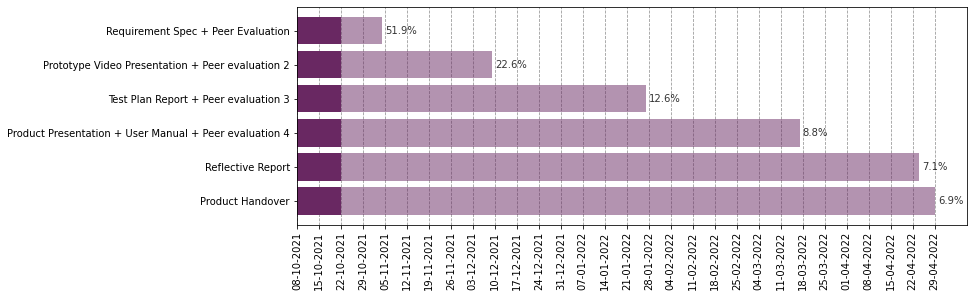

In [50]:
x_dimension = 12
y_dimension = 4

fig, ax = plt.subplots(1, figsize=(x_dimension, y_dimension))


ax.barh( # the lighter part of the bar - delineates the entire length of the section of the coursework
    df[TASK_NAME],                                # y-axis labels
    df["days_start_to_end"],                      # length of bar
    left = df["start_num"],                       # indent from left
    color = COLOUR,                               # colour of bar - default is some kind of blue
    alpha = 0.5 if PROGRESS else 1.0              # opacity of bar
)



# ticks (what are ticks? https://www.mit.edu/~mbarker/formula1/f1help/13-ch-a6.htm)
xticks = np.arange( # arange is just an array of 
    0,                       # start
    df["end_num"].max() + 7, # stop -- no need to add_days() because `df["end_num"].max()` is an integer
    7                        # step -- value 7 because we want one tick for every week
)


# specifying the values of the x-axis ticks and their labels
end_day = convert_str_to_date(df[END_DATE].max())

xticks_labels = pd.date_range(
    proj_start,
    end = add_days(end_day, 7)
)
xticks_labels = [reverse_date_str(date.isoformat()[:10]) for date in xticks_labels][::7]


# set ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)

# rotates the x-axis labels vertically to make the dates actually readable
plt.xticks(rotation='vertical')


# add vertical dashes from each tick to help better judge where bars go up to
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')


if PROGRESS:
    
    progress = []
    for index, row in df.iterrows():

        start_date = convert_str_to_date(row[START_DATE])
        finish_date = convert_str_to_date(row[END_DATE])

        if (DATE_TODAY - start_date).days < 0:
            # the current date is before the Hand out Date
            progress.append(0)
        elif (finish_date - DATE_TODAY).days < 0:
            # current date is past the Submission Date
            progress.append(row["days_start_to_end"])
        else:
            progress.append((DATE_TODAY - start_date).days)
    df["progress"] = progress
    
    ax.barh(
        df[TASK_NAME],           # y-axis labels
        df["progress"],          # length of bar
        left = df["start_num"],  # indent from left
        color = COLOUR           # colour of bar
    )
    
    # add %'s to each bar to show progress
    for index, row in enumerate(df.iterrows()):
        row = row[1]
        percent_progress = row["progress"] / row["days_start_to_end"] * 100
        rounded = round(percent_progress, 1)
        x_coordinate = row["end_num"] + 1 # this is fine
        y_coordinate = index
        percent_progress_str = f'{rounded}%'
        ax.text(
            x = x_coordinate,
            y = y_coordinate,
            s = percent_progress_str,
            va = "center",
            alpha = 0.8
        )

plt.gca().invert_yaxis()

plt.show()